# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Chelsea Brammer  https://github.com/chelsbrammer/web-scraping

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [1]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                       Version
----------------------------- --------------------
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
asgiref                       3.6.0
astroid                       2.11.7
astropy                       5.1
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bitarray                      2.5.1
bkcharts                      0.2
blac

#### Question 1.

Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [16]:
response = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')

text = response.text

with open('laser_headlights.pkl', 'wb') as f:
    pickle.dump(text, f)

#### Question 2.

Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [30]:
with open('laser_headlights.pkl', 'rb') as f:
    article_html = pickle.load(f)

parser = 'html5lib'
soup = BeautifulSoup(article_html, parser)

article_element = soup.find('article')

print(article_element.get_text())


    
        How Laser Headlights Work
        
            
                130 Comments            
            
                by:
                Lewin Day
            
        

        
            March 22, 2021
            
                
                
            
        

        
    

    
        When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first i

#### Question 3.

Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [37]:
nlp = spacy.load('en_core_web_sm')

doc = nlp(article_element.get_text())

tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

freq_tokens = Counter(tokens).most_common(5)

# Printing common tokens with appropriate label and their frequencies with appropriate label
print('\n5 most frequent tokens:')
for token in freq_tokens:
    print(f'{token[0]}: {token[1]}')


5 most frequent tokens:
laser: 35
headlights: 19
headlight: 11
technology: 10
led: 10


#### Question 4.

Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [41]:
lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]
lemma_freq = Counter(lemmas)

print("\n5 most frequent lemmas:")
for lemma, freq in lemma_freq.most_common(5):
    print(f"{lemma}: {freq}")


5 most frequent lemmas:
laser: 40
headlight: 28
beam: 12
technology: 10
light: 10


#### Question 5.

Define the following methods:

    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [50]:
def score_sentence_by_token(sentence, interesting_token):
    total_word_count = len([token for token in sentence])
    interesting_word_count = len([token.text.lower() for token in sentence if token.text in interesting_token])
    token_score = interesting_word_count / total_word_count
    return token_score

sentences = list(doc.sents)
print(score_sentence_by_token(sentences[0], tokens))

0.15


In [51]:
def score_sentence_by_lemma(sentence, interesting_lemmas):
    total_word_count = len([word for word in sentence])
    interesting_lemma_count = len([token.lemma_.lower() for token in sentence if token.lemma_ in interesting_lemmas])
    lemma_score = interesting_lemma_count / total_word_count
    return lemma_score

sentences = list(doc.sents)
print(score_sentence_by_lemma(sentences[0], lemmas))

0.0


#### Question 6.

Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

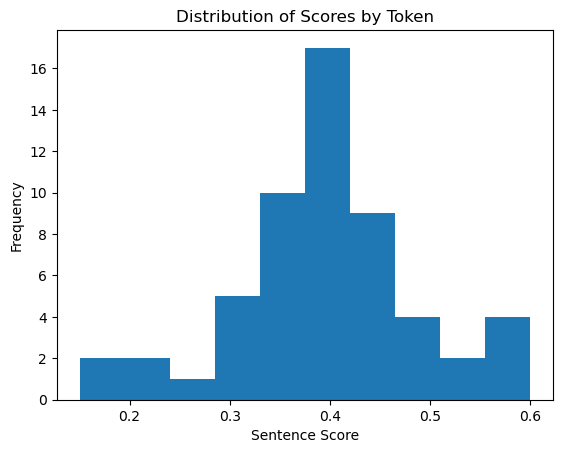

In [54]:
# Get list of scores by token
token_scores = []
for sentence in list(doc.sents):
    score = score_sentence_by_token(sentence, tokens)
    token_scores.append(score)

# Plot distribution of scores
plt.hist(token_scores)
plt.title('Distribution of Scores by Token')
plt.xlabel('Sentence Score')
plt.ylabel('Frequency')
plt.show()

#### Question 7.

Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

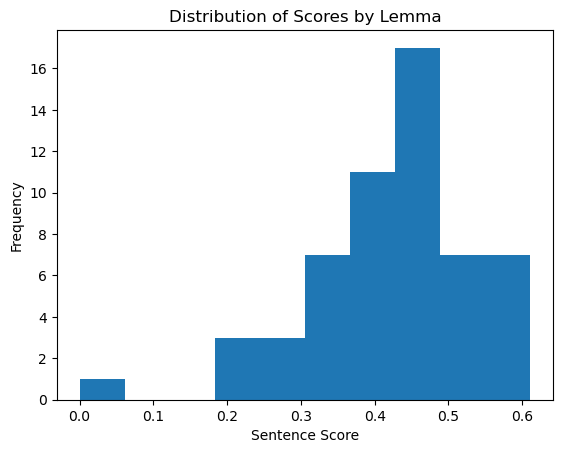

In [56]:
lemma_scores = []
for sentence in list(doc.sents):
    score = score_sentence_by_lemma(sentence, lemmas)
    lemma_scores.append(score)

plt.hist(lemma_scores)
plt.title('Distribution of Scores by Lemma')
plt.xlabel('Sentence Score')
plt.ylabel('Frequency')
plt.show()

#### Question 8.

Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

The token "led" and the lemma "light" would be omitted from the lists generated in questions 3 and 5 if we only wanted to consider nouns as interesting words. We could change the code by using token.pos_ function. 

In [57]:
!jupyter nbconvert --to html web-scraping.ipynb

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook web-scraping.ipynb to html
[NbConvertApp] Writing 663277 bytes to web-scraping.html
